For this project, you need to complete the following steps:

First, compute the camera calibration matrix and distortion coefficients given a set of chessboard images (in the camera_cal folder in the repository).

Next, for a series of test images (in the test_images folder in the repository):

1. Apply the distortion correction to the raw image.
2. Use color transforms, gradients, etc., to create a thresholded binary image.
3. Apply a perspective transform to rectify binary image ("birds-eye view").
4. Detect lane pixels and fit to find lane boundary.
5. Determine curvature of the lane and vehicle position with respect to center.
6. Warp the detected lane boundaries back onto the original image.
7. Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.
8. Once you have implemented a successful pipeline on the test images, you will run your algorithm on a video. In the case of the video, you must search for the lane lines in the first few frames, and, once you have a high-confidence detection, use that information to track the position and curvature of the lines from frame to frame.
9. Check out the project rubric before you submit to make sure your project is complete!.

In [50]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#import image_transformation  # my image transformation python file example
#import camera_calibration as cc  # my camera calibration python file example
%run camera_calibration # import my camera calibration python function
%run image_transformation # include functions to test for

#img = mpimg.imread('stopsign.jpg')

#plotImageSet([img,])


In [51]:
# 0. Calibrate the camera using the calibration images
nx = 9 # number of inside corners in x
ny = 6 # number of inside corners in y
mtx,dist = calibrate_camera('camera_cal/calibration*.jpg',nx, ny)

Calibrating camera... please be patient!
Camera calibrated using  17  out of  20  images!


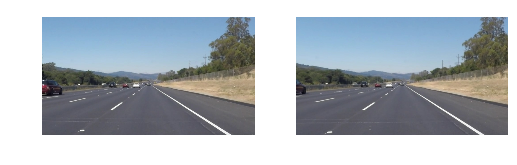

In [52]:
# 1 .Apply distortion correction to the raw image.
fname = 'test_images/solidWhiteRight.jpg'
img = mpimg.imread(fname)
undistorted_im = cv2.undistort(img, mtx, dist, None, mtx)

# display original and undistorted
plotImageSet([img,undistorted_im])

In [53]:
# 2. Use color transforms, gradients, etc., to create a thresholded binary image.

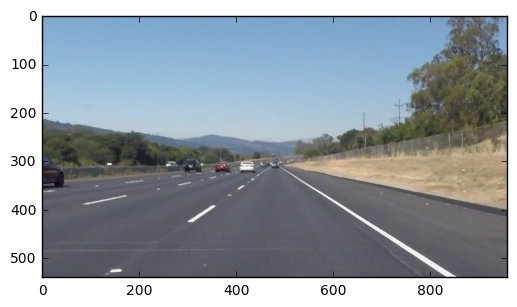

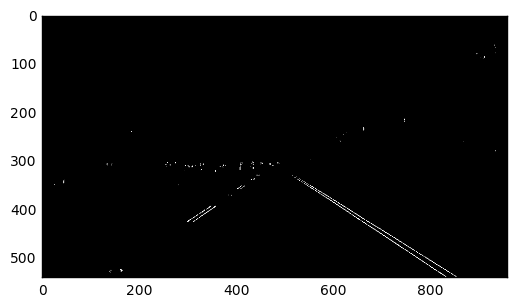

In [82]:

#0 change color space to HLS
image_hls = cv2.cvtColor(undistorted_im,cv2.COLOR_RGB2HLS)

def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    # Grayscale
    #1 convert to gray
    gray_im = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Apply cv2.Sobel()
    if orient=='x':
        sobelx = cv2.Sobel(gray_im, cv2.CV_64F, 1, 0)
    else:
        sobely = cv2.Sobel(gray_im, cv2.CV_64F, 0, 1)   
    # Take the absolute value of the output from cv2.Sobel()
    abs_sobelx = np.absolute(sobelx)
    # Scale the result to an 8-bit range (0-255)
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    # Apply lower and upper thresholds
    # Create binary_output
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    
    return binary_output


plt.imshow(undistorted_im);
plt.show()
sxbinary = abs_sobel_thresh(undistorted_im)
plt.imshow(sxbinary, cmap='gray');

In [ ]:
#2 apply gaussian blur to smoothen the image
kernel_size = 5; #should be an odd number
image_gaus = gaussian_blur(gray_im, kernel_size);

#3 apply canny filter
low_threshold =50;
high_threshold = 200;
image_canny = canny(image_gaus, low_threshold, high_threshold);

#4 apply mask
imshape = image_canny.shape;
vertices = np.array([[(0,imshape[0]),(imshape[1]/2,imshape[0]*4/7), (imshape[1], imshape[0])]], dtype=np.int32);
image_mask = region_of_interest(image_canny, vertices);

#5 apply Hough transform
rho = 2 # distance resolution in pixels of the Hough grid
theta = 1*np.pi/180 # angular resolution in radians of the Hough grid
threshold = 25     # 25 minimum number of votes (intersections in Hough grid cell)
min_line_length = 40 #15 minimum number of pixels making up a line
max_line_gap = 70   #3 maximum gap in pixels between connectable line segments
lower_x = 0;
upper_x = imshape[1];
lower_y = imshape[0]*4/7;
upper_y = imshape[0];
image_hough = hough_lines(image_mask, rho, theta, threshold, min_line_length, max_line_gap);

#6 annotated image
image_annotated = weighted_img(image_hough, undistorted_im);



#proc_im = process_image(undistorted_im)
plotImageSet([undistorted_im,sobelx,sobely])

In [ ]:
# 3. Apply a perspective transform to rectify binary image ("birds-eye view").

#four source coordinates
src = np.float32(
    [[92,70],
     [246,16],
     [82,104],
     [269,38]])
    
#     four desired coordinates
dst = np.float32(
    [[80,60],
    [250,60],
    [80,100],
     [250,100]])
img = mpimg.imread('stopsign.jpg')
warped_img = warp(img,src,dst,0)
plotImageSet([img,warped_img])
warped_back = warp(warped_img,src,dst,1)
plotImageSet([img,warped_img,warped_back])

In [ ]:
# 4. Detect lane pixels and fit to find lane boundary.


In [ ]:
# 5. Determine curvature of the lane and vehicle position with respect to center.


In [ ]:
# 6. Warp the detected lane boundaries back onto the original image.


In [ ]:
# 7. Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.